<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/disruptionsbycategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# @title
!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


In [ ]:
# @title
##from google.colab import drive
#drive.mount('/content/drive')

### **data cleaning**

In [ ]:
# @title
#importing data from github. switched from google drive.
#url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-alpha.csv' # Changed url to raw data url
# using beta coding data file
#url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv'
# using gamma coding data file
url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-gamma.csv'

df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,cid,uniquecid,...,Disruption labor produced.2,affect-goal: how did circumstance affect your goal? (answer only if,change- how did you change your goal in response to circumstance,Goal changes,notes.2,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [ ]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

In [ ]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal:_how_did_circumstance_affect_your_goal?_(answer_only_if,change-_how_did_you_change_your_goal_in_response_to_circumstance,goal_changes,notes.2,disruption_labor_aggregated,pid*gid,pid*gid*cid,disruption_status
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,No response,S01*goal1,S01*goal1*circ1,Disruption
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,Emotional,S01*goal1,S01*goal1*circ2,Disruption
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,Physical,S01*goal1,S01*goal1*circ3,Disruption
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,Emotional,S01*goal2,S01*goal2*circ1,Disruption
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,Emotional,S01*goal2,S01*goal2*circ2,Disruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,NaN,"Emotional, Financial, Logistical",S149*goal1,S149*goal1*circ2,Disruption
685,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed quantity,NaN,Emotional,S149*goal1,S149*goal1*circ3,Disruption
686,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed quantity,NaN,Emotional,S149*goal1,S149*goal1*circ4,Disruption
687,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Paused,changed to paused from substituted activity- t...,"Physical, Emotional",S149*goal2,S149*goal2*circ1,Disruption


## num of disruptions by disruption category ananlysis

### number of disruptions by disruptions categories

In [ ]:
# @title
# Number of disruptions (cid) under each disruptions category

# Identifier: gid*pid*cid

df_dis_categories = df[['pid*gid*cid', 'situation_that_occurred', 'disruption_status']]

# filter out disruption_status = Disruption
df_dis_categories = df_dis_categories[df_dis_categories['disruption_status'] == 'Disruption']

# aggregate based on disruption categories
pivot = df_dis_categories.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_each_category = pivot.reset_index()

dis_each_category.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_each_category.sort_values(by='count of disruptions', ascending=False, inplace=True)

#goals_each_category_graph = goals_each_category

# Calculate the total count#
total_count = dis_each_category['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_each_category = pd.concat([dis_each_category, total_row], ignore_index=True)
dis_each_category

,situation_that_occurred,count of disruptions
0,Finances,120
1,Internal - Feelings and thoughts,113
2,Work,77
3,Social interaction - other,60
4,Pain,45
5,Social interactions - negative,29
6,Diet,26
7,Weather,22
8,Health,21
9,Travel,18


In [ ]:
# renaming and combining certain disruption categories
dis_each_category_combined=df_dis_categories
#creating new dataframe for combined categories
dis_each_category_combined['situation_that_occurred'] = df_dis_categories['situation_that_occurred'].replace({
    'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})



# filter out disruption_status = Disruption
dis_each_category_combined = dis_each_category_combined[dis_each_category_combined['disruption_status'] == 'Disruption']

# aggregate based on disruption categories
pivot = dis_each_category_combined.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_each_category_combined = pivot.reset_index()

dis_each_category_combined.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_each_category_combined.sort_values(by='count of disruptions', ascending=False, inplace=True)

dis_each_category_graph = dis_each_category_combined

# Calculate the total count#
total_count = dis_each_category_combined['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_each_category_combined = pd.concat([dis_each_category_combined, total_row], ignore_index=True)
dis_each_category_combined

,situation_that_occurred,count of disruptions
0,Social disruptions,225
1,Financial disruptions,142
2,Emotional and Cognitive disruptions,117
3,Health disruptions,106
4,Environmental disruptions,46
5,Total,636


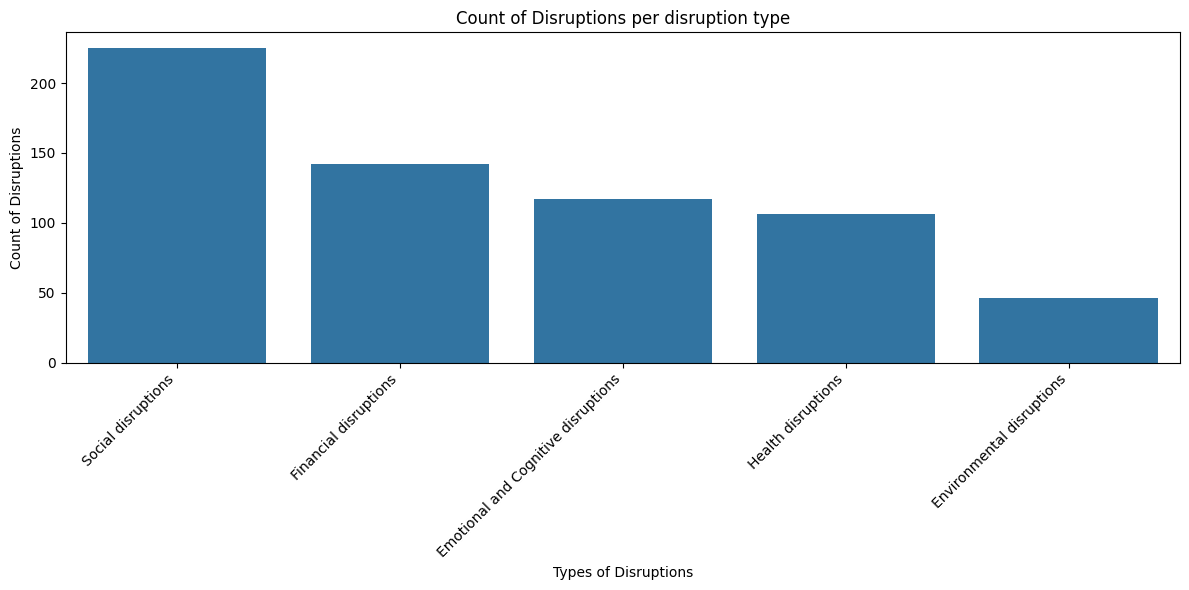

In [ ]:
# prompt: Using dataframe dis_each_category_combined: using seaborn plot on bar chart

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
sns.barplot(x='situation_that_occurred', y='count of disruptions', data=dis_each_category_graph)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel("Types of Disruptions")
plt.ylabel("Count of Disruptions")
plt.title("Count of Disruptions per disruption type")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### number of UNIQUE disruptions by disruption categories analysis

In [ ]:
# @title
# Number of disruptions (cid) under each disruptions category

# Identifier: gid*pid*cid

df_dis_categories_unique = df[['pid','duplicate?', 'situation_that_occurred', 'disruption_status']]

# filter out disruption_status = Disruption
df_dis_categories_unique = df_dis_categories_unique[df_dis_categories_unique['disruption_status'] == 'Disruption']

#filter out duplicate = Yes
df_dis_categories_unique = df_dis_categories_unique[df_dis_categories_unique['duplicate?'] == 'No']

# aggregate based on disruption categories
pivot = df_dis_categories_unique.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_each_category = pivot.reset_index()

dis_each_category.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_each_category.sort_values(by='count of disruptions', ascending=False, inplace=True)

#goals_each_category_graph = goals_each_category

# Calculate the total count#
total_count = dis_each_category['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_each_category = pd.concat([dis_each_category, total_row], ignore_index=True)
dis_each_category

,situation_that_occurred,count of disruptions
0,Finances,99
1,Internal - Feelings and thoughts,90
2,Work,62
3,Social interaction - other,58
4,Pain,41
5,Diet,25
6,Social interactions - negative,24
7,Weather,21
8,Health,19
9,Employment,16


In [ ]:
# renaming and combining certain disruption categories
dis_each_category_combined=df_dis_categories_unique
#creating new dataframe for combined categories
dis_each_category_combined['situation_that_occurred'] = df_dis_categories_unique['situation_that_occurred'].replace({
     'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})

#filter out duplicate = Yes
df_dis_categories_unique = df_dis_categories_unique[df_dis_categories_unique['duplicate?'] == 'No']

# filter out disruption_status = Disruption
dis_each_category_combined = dis_each_category_combined[dis_each_category_combined['disruption_status'] == 'Disruption']


# aggregate based on disruption categories
pivot = dis_each_category_combined.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_each_category_combined = pivot.reset_index()

dis_each_category_combined.rename(columns={0: 'count of unique disruptions'}, inplace=True)

dis_each_category_combined.sort_values(by='count of unique disruptions', ascending=False, inplace=True)

dis_each_category_graph = dis_each_category_combined

# Calculate the total count#
total_count = dis_each_category_combined['count of unique disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of unique disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_each_category_combined = pd.concat([dis_each_category_combined, total_row], ignore_index=True)
dis_each_category_combined

,situation_that_occurred,count of unique disruptions
0,Social disruptions,187
1,Financial disruptions,120
2,Health disruptions,97
3,Emotional and Cognitive disruptions,94
4,Environmental disruptions,45
5,Total,543


## barriers vs events counts

In [ ]:
# @title
# Number of disruptions (cid) under each disruptions category

# Identifier: gid*pid*cid

df_dis_categories_unique = df[['pid','duplicate?', 'situation_that_occurred', 'disruption_status','barrier_or_event' ]]

# filter out disruption_status = Disruption
df_dis_categories_unique = df_dis_categories_unique[df_dis_categories_unique['disruption_status'] == 'Disruption']

#filter out duplicate = Yes
df_dis_categories_unique = df_dis_categories_unique[df_dis_categories_unique['duplicate?'] == 'No']

# aggregate based on barrier_or_event
pivot = df_dis_categories_unique.pivot_table(index='barrier_or_event', aggfunc='size', fill_value=0)

dis_barrierevents = pivot.reset_index()

dis_barrierevents.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_barrierevents.sort_values(by='count of disruptions', ascending=False, inplace=True)
# Calculate the total count#
total_count = dis_barrierevents['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'barrier_or_event': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_barrierevents = pd.concat([dis_barrierevents, total_row], ignore_index=True)
dis_barrierevents

,barrier_or_event,count of disruptions
0,event,473
1,barrier,64
2,not enough information,5
3,barrier-unconfident,1
4,Total,543


event breakdown by category

In [ ]:
# filter df_dis_categories_unique where barrier_or_event == event only
df_dis_categories_unique_event = df_dis_categories_unique[df_dis_categories_unique['barrier_or_event'] == 'event']

# renaming and combining certain disruption categories
dis_event_category_combined=df_dis_categories_unique_event
#creating new dataframe for combined categories
dis_event_category_combined['situation_that_occurred'] = df_dis_categories_unique_event['situation_that_occurred'].replace({
    'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})

# aggregate based on disruption categories
pivot = df_dis_categories_unique_event.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_event_category = pivot.reset_index()

dis_event_category.rename(columns={0: 'count of event-disruptions'}, inplace=True)

dis_event_category.sort_values(by='count of event-disruptions', ascending=False, inplace=True)

#goals_each_category_graph = goals_each_category

# Calculate the total count#
total_count = dis_event_category['count of event-disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of event-disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_event_category = pd.concat([dis_event_category, total_row], ignore_index=True)
dis_event_category

/tmp/ipython-input-3142809903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_event_category_combined['situation_that_occurred'] = df_dis_categories_unique_event['situation_that_occurred'].replace({


,situation_that_occurred,count of event-disruptions
0,Social disruptions,179
1,Health disruptions,93
2,Financial disruptions,90
3,Emotional and Cognitive disruptions,67
4,Environmental disruptions,44
5,Total,473


barrier-breakdown

In [ ]:
# filter df_dis_categories_unique where barrier_or_event == event only
df_dis_categories_unique_barrier = df_dis_categories_unique[df_dis_categories_unique['barrier_or_event'] == 'barrier']

# renaming and combining certain disruption categories
dis_barrier_category_combined=df_dis_categories_unique_barrier
#creating new dataframe for combined categories
dis_barrier_category_combined['situation_that_occurred'] = df_dis_categories_unique_barrier['situation_that_occurred'].replace({
    'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})

# aggregate based on disruption categories
pivot = df_dis_categories_unique_barrier.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_barrier_category = pivot.reset_index()

dis_barrier_category.rename(columns={0: 'count of barrier-disruptions'}, inplace=True)

dis_barrier_category.sort_values(by='count of barrier-disruptions', ascending=False, inplace=True)

#goals_each_category_graph = goals_each_category

# Calculate the total count#
total_count = dis_barrier_category['count of barrier-disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of barrier-disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_barrier_category = pd.concat([dis_barrier_category, total_row], ignore_index=True)
dis_barrier_category

/tmp/ipython-input-1639849831.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_barrier_category_combined['situation_that_occurred'] = df_dis_categories_unique_barrier['situation_that_occurred'].replace({


,situation_that_occurred,count of barrier-disruptions
0,Financial disruptions,28
1,Emotional and Cognitive disruptions,27
2,Social disruptions,5
3,Health disruptions,3
4,Environmental disruptions,1
5,Total,64


In [ ]:
# merge dis_barrier_category and dis_event_category along situation_that_occurred and assign 0 for NaN or empty values
dis_barrier_event_category = pd.merge(dis_barrier_category, dis_event_category, on='situation_that_occurred', how='outer').fillna(0)
# remove row where situation_that_occurred == Total
dis_barrier_event_category = dis_barrier_event_category[dis_barrier_event_category['situation_that_occurred'] != 'Total']

#sort descending by count of event-disruptions
dis_barrier_event_category = dis_barrier_event_category.sort_values(by='count of event-disruptions', ascending=False)
dis_barrier_event_category

,situation_that_occurred,count of barrier-disruptions,count of event-disruptions
4,Social disruptions,5,179
3,Health disruptions,3,93
2,Financial disruptions,28,90
0,Emotional and Cognitive disruptions,27,67
1,Environmental disruptions,1,44


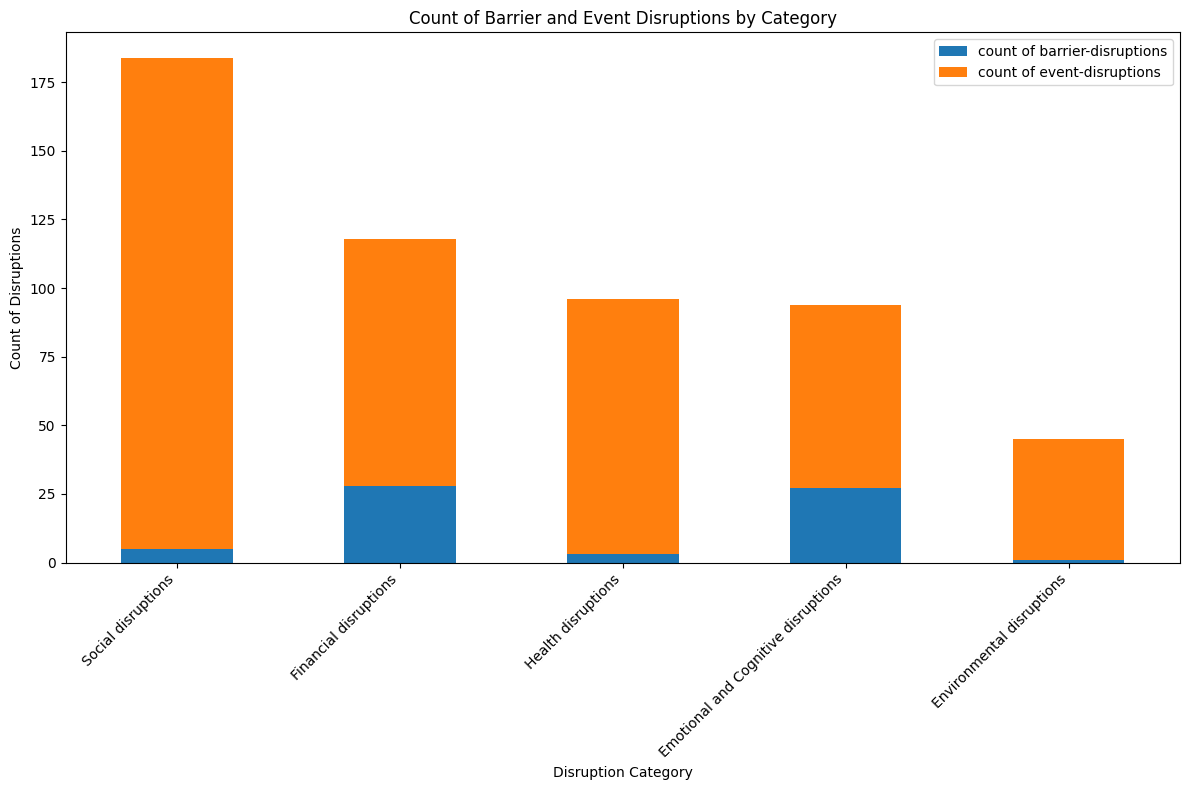

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total count for each category
dis_barrier_event_category['total_count'] = dis_barrier_event_category['count of barrier-disruptions'] + dis_barrier_event_category['count of event-disruptions']

# Sort the DataFrame by total_count in descending order
dis_barrier_event_category = dis_barrier_event_category.sort_values(by='total_count', ascending=False)

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
dis_barrier_event_category[['situation_that_occurred','count of barrier-disruptions','count of event-disruptions']].plot(
    x='situation_that_occurred',
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    ax=plt.gca() # Plot on the current axes
)


plt.xticks(rotation=45, ha='right')
plt.xlabel("Disruption Category")
plt.ylabel("Count of Disruptions")
plt.title("Count of Barrier and Event Disruptions by Category")
plt.tight_layout()
plt.show()

##

## disruptions from non-finance and non-education/career goals


In [ ]:
df_dis_cat_wellbeing = df[['pid','gid','pid*gid*cid','duplicate?','goal_categories', 'barrier_or_event', 'situation_that_occurred', 'disruption_status']]
# filter out disruption_status = Disruption
df_dis_cat_wellbeing = df_dis_cat_wellbeing[df_dis_cat_wellbeing['disruption_status'] == 'Disruption']
#filter out goal_categories == 'Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning', 'Recreation', 'Shopping'
df_dis_cat_wellbeing = df_dis_cat_wellbeing[~df_dis_cat_wellbeing['goal_categories'].isin(['Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning','Recreation', 'Shopping'])]
df_dis_cat_wellbeing

,pid,gid,pid*gid*cid,duplicate?,goal_categories,barrier_or_event,situation_that_occurred,disruption_status
3,S01,goal2,S01*goal2*circ1,No,Mental health and wellbeing,event,Social interactions - negative,Disruption
4,S01,goal2,S01*goal2*circ2,No,Mental health and wellbeing,barrier,Finances,Disruption
5,S01,goal2,S01*goal2*circ3,No,Mental health and wellbeing,barrier,Social interactions - negative,Disruption
6,S01,goal2,S01*goal2*circ4,No,Mental health and wellbeing,event,Weather,Disruption
7,S01,goal2,S01*goal2*circ5,No,Mental health and wellbeing,event,Finances,Disruption
...,...,...,...,...,...,...,...,...
680,S148,goal2,S148*goal2*circ1,No,Physical Activity,event,Pain,Disruption
681,S148,goal2,S148*goal2*circ2,No,Physical Activity,event,Work,Disruption
682,S148,goal2,S148*goal2*circ3,No,Physical Activity,event,Social interaction - other,Disruption
687,S149,goal2,S149*goal2*circ1,No,Physical Activity,event,Pain,Disruption


count of ALL disruptions for health and well-being goals.

In [ ]:
# renaming and combining certain disruption categories
dis_cat_wellbeing= df_dis_cat_wellbeing[['situation_that_occurred','pid','duplicate?','barrier_or_event']]
#creating new dataframe for combined categories
dis_cat_wellbeing['situation_that_occurred'] = df_dis_cat_wellbeing['situation_that_occurred'].replace({
       'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})

# aggregate based on disruption categories
pivot = dis_cat_wellbeing.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_cat_wellbeing = pivot.reset_index()

dis_cat_wellbeing.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_cat_wellbeing.sort_values(by='count of disruptions', ascending=False, inplace=True)

# dis_cat_wellbeing_graph = dis_cat_wellbeing

# Calculate the total count#
total_count = dis_cat_wellbeing['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_cat_wellbeing = pd.concat([dis_cat_wellbeing, total_row], ignore_index=True)
dis_cat_wellbeing

/tmp/ipython-input-2369308108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_cat_wellbeing['situation_that_occurred'] = df_dis_cat_wellbeing['situation_that_occurred'].replace({


,situation_that_occurred,count of disruptions
0,Social disruptions,179
1,Health disruptions,95
2,Emotional and Cognitive disruptions,82
3,Environmental disruptions,32
4,Financial disruptions,29
5,Total,417


count of unique disruptions fro health and well-being goals

In [ ]:
# filter out duplicate? = yes
df_dis_cat_wellbeing_unique = df_dis_cat_wellbeing[df_dis_cat_wellbeing['duplicate?'] == 'No']

In [ ]:
# renaming and combining certain disruption categories
dis_cat_wellbeing_unique= df_dis_cat_wellbeing_unique[['situation_that_occurred','pid','barrier_or_event']]
#creating new dataframe for combined categories
dis_cat_wellbeing_unique['situation_that_occurred'] = df_dis_cat_wellbeing_unique['situation_that_occurred'].replace({
     'Internal - Feelings and thoughts': 'Emotional and Cognitive disruptions',
    'Internal-Skills': 'Emotional and Cognitive disruptions',
    'Resources': 'Financial disruptions',
    'Pain': 'Health disruptions',
    'Diet': 'Health disruptions',
    'Sleep': 'Health disruptions',
    'Health': 'Health disruptions',
    'Finances': 'Financial disruptions',
    'Employment': 'Financial disruptions',
    'Social interaction - other': 'Social disruptions',
    'Social interactions - negative': 'Social disruptions',
    'Travel': 'Social disruptions',
    'Entertainment':'Social disruptions',
    'Caregiving': 'Social disruptions',
    'Housework': 'Social disruptions',
    'Other':'Social disruptions',
    'Weather': 'Environmental disruptions',
    'Surroundings': 'Environmental disruptions',
    'Transportation':'Environmental disruptions',
    'Technical': 'Environmental disruptions',
    'Work': 'Social disruptions'
})

# aggregate based on disruption categories
pivot = dis_cat_wellbeing_unique.pivot_table(index='situation_that_occurred', aggfunc='size', fill_value=0)

dis_cat_wellbeing_unique_agg = pivot.reset_index()

dis_cat_wellbeing_unique_agg.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_cat_wellbeing_unique_agg.sort_values(by='count of disruptions', ascending=False, inplace=True)

# dis_cat_wellbeing_graph = dis_cat_wellbeing

# Calculate the total count#
total_count = dis_cat_wellbeing_unique_agg['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_cat_wellbeing_unique_agg = pd.concat([dis_cat_wellbeing_unique_agg, total_row], ignore_index=True)
dis_cat_wellbeing_unique_agg

/tmp/ipython-input-1900516056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_cat_wellbeing_unique['situation_that_occurred'] = df_dis_cat_wellbeing_unique['situation_that_occurred'].replace({


,situation_that_occurred,count of disruptions
0,Social disruptions,148
1,Health disruptions,87
2,Emotional and Cognitive disruptions,64
3,Environmental disruptions,31
4,Financial disruptions,20
5,Total,350


### comparing reduction in num of disruptions after filtering out

In [ ]:
#join dis_each_category_combined and dis_cat_wellbeing_unique around situation_that_occurred
dis_unique_allVsWellbeingGoals = dis_each_category_combined.merge(dis_cat_wellbeing_unique_agg, on='situation_that_occurred', how='left')
dis_unique_allVsWellbeingGoals

,situation_that_occurred,count of unique disruptions,count of disruptions
0,Social disruptions,187,148
1,Financial disruptions,120,20
2,Health disruptions,97,87
3,Emotional and Cognitive disruptions,94,64
4,Environmental disruptions,45,31
5,Total,543,350


## barrier vs event for wellbeing goals only

In [ ]:

# aggregate based on barrier_or_event
pivot = dis_cat_wellbeing_unique.pivot_table(index='barrier_or_event', aggfunc='size', fill_value=0)

dis_wellbeing_barrierevents = pivot.reset_index()

dis_wellbeing_barrierevents.rename(columns={0: 'count of disruptions'}, inplace=True)

dis_wellbeing_barrierevents.sort_values(by='count of disruptions', ascending=False, inplace=True)
# Calculate the total count#
total_count = dis_wellbeing_barrierevents['count of disruptions'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'barrier_or_event': ['Total'], 'count of disruptions': [total_count]})

# Concatenate the original DataFrame and the total row
dis_wellbeing_barrierevents = pd.concat([dis_wellbeing_barrierevents, total_row], ignore_index=True)
dis_wellbeing_barrierevents

,barrier_or_event,count of disruptions
0,event,319
1,barrier,28
2,not enough information,3
3,Total,350
